In [20]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
csvList = []
project_path = '/home/roshan/Projects/'
for dirpath,dirnames,files in os.walk(project_path):
    for name in files:
        if name.lower().endswith('.csv'):
            csvList.append(os.path.join(dirpath+'/'+name))
dataMat = pd.DataFrame()
for rf in csvList:
    tmp = pd.read_csv(rf)
    dataMat = dataMat.append(tmp)
print('Data Loaded!')


Data Loaded!


In [17]:
# Make log data matrix for plotting

In [4]:
dataMat.animID.unique()

array(['RZ9', 'RZ8', 'RZ10', 'RZ7', 'RW7', 'RW9', 'RW8', 'RW10'],
      dtype=object)

In [4]:
# Set plot style
custom_style = {'figure.facecolor':'.4',
                "axes.facecolor":".4",
                'axes.edgecolor':'.4',
                "axes.labelcolor":"white",
                "axes.grid":False,
                'grid.color':'black',
                "text.color":"white",
                "patch_edgecolor":'white',
                "xtick.color":"white",
                "ytick.color":"white",
                'axes.edgecolor':'black'}
sns.set_style('white',rc=custom_style)
sns.set_context('talk')
col_palette = sns.color_palette("husl")
def addTitle(fig=None,title=''):
    plt.subplots_adjust(top=.85)
    fig.fig.suptitle(title)

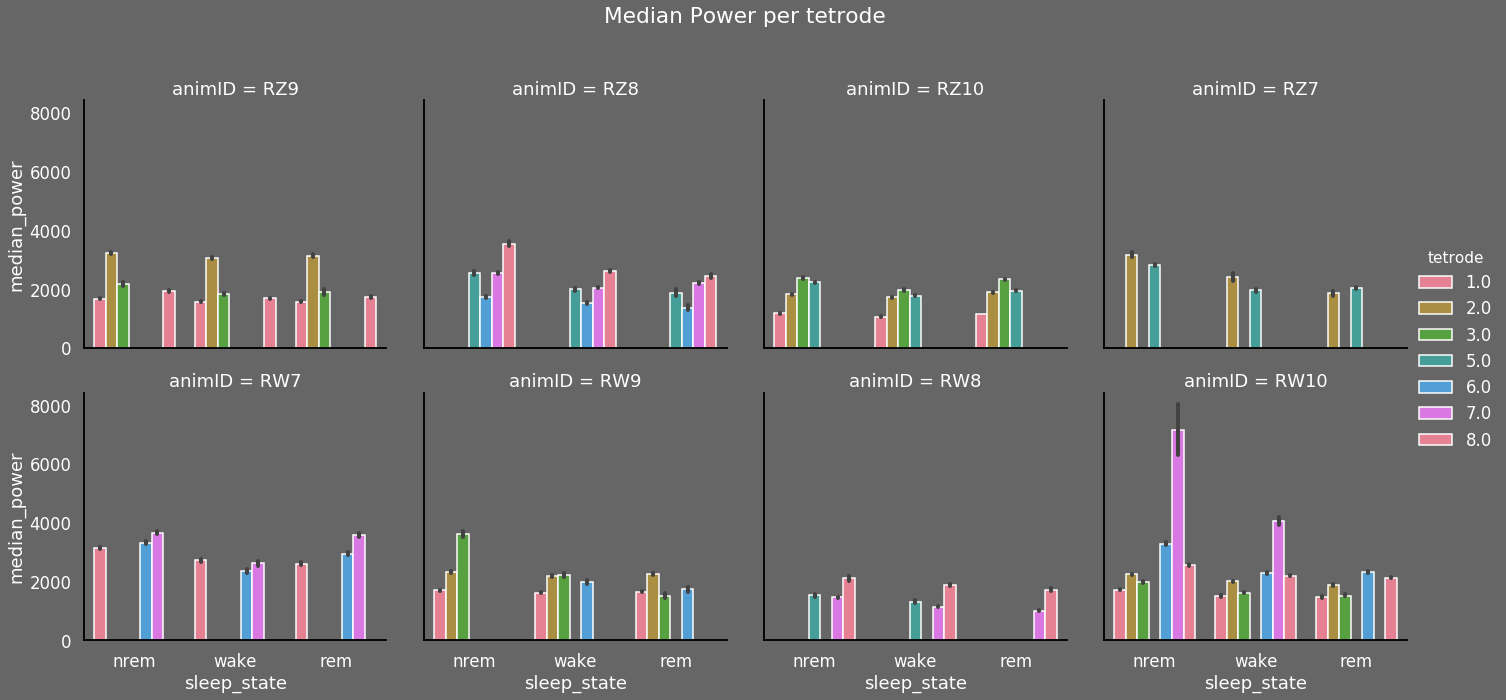

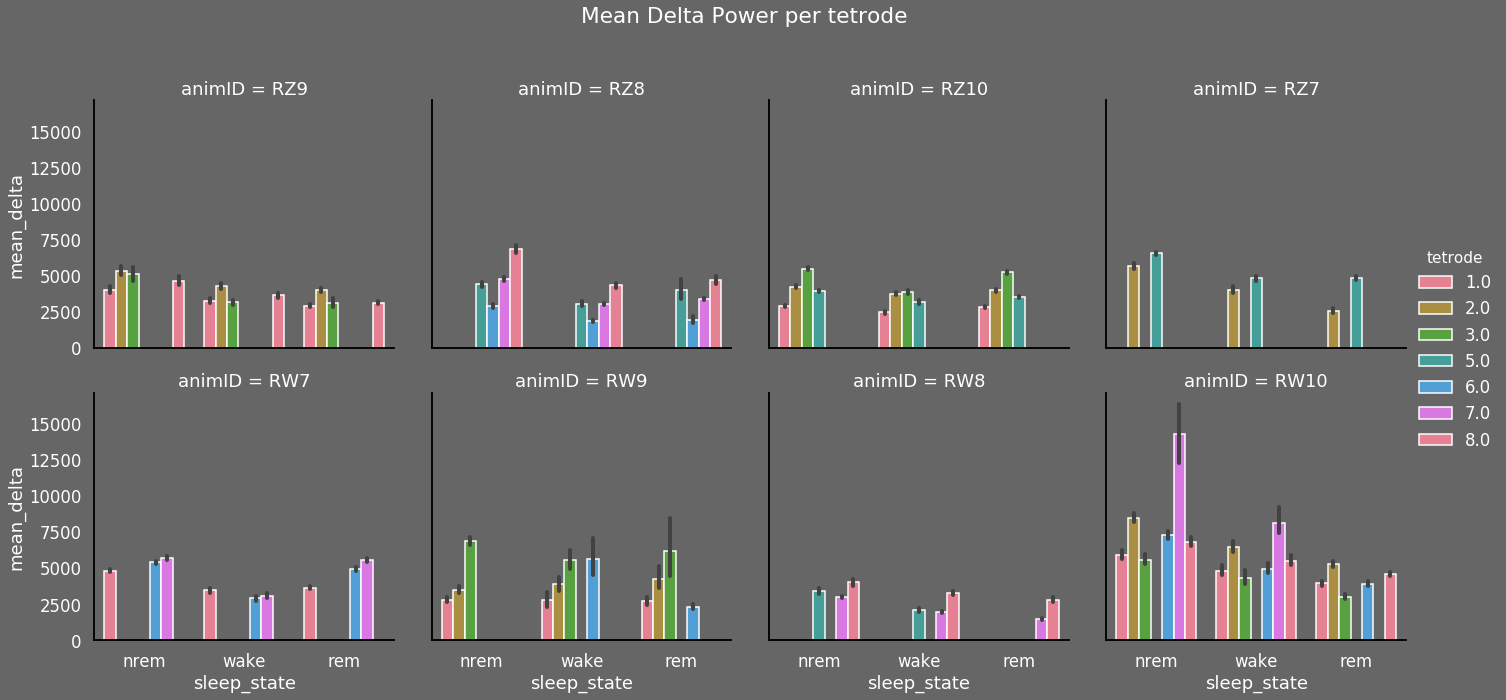

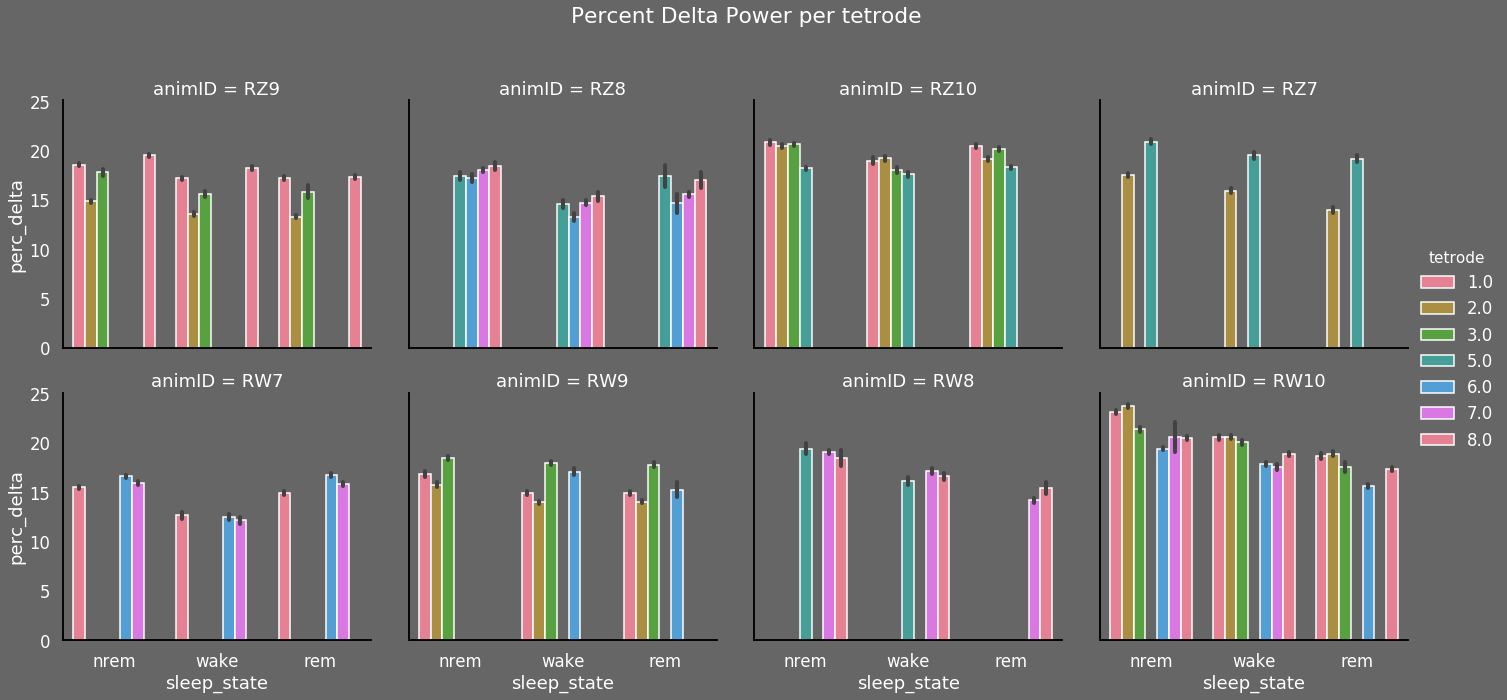

In [7]:
# Plot sleep epoch median power for each tetrode
# Looking for tetrodes with abnormal/extraneous power profile
crit1 = dataMat['sleep_state']!='transition'
crit2 = dataMat['epoch_type']=='Sleep'
g = sns.catplot(x='sleep_state',y='median_power',hue='tetrode',col='animID',data=dataMat[crit1 & crit2],kind='bar',col_wrap=4,palette=col_palette)
addTitle(g,'Median Power per tetrode')
# Add look at delta power on each tetrode
g2 = sns.catplot(x='sleep_state',y='mean_delta',hue='tetrode',col='animID',data=dataMat[crit1 & crit2],kind='bar',col_wrap=4,palette=col_palette)
addTitle(g2,'Mean Delta Power per tetrode')
# Add look at PERCENT delta power on each tetrode
g2 = sns.catplot(x='sleep_state',y='perc_delta',hue='tetrode',col='animID',data=dataMat[crit1 & crit2],kind='bar',col_wrap=4,palette=col_palette)
addTitle(g2,'Percent Delta Power per tetrode')

In [21]:
# Decided to use mean power since it seems the relations still hold regardless of using mean or total 
# Now create columns for log mean power 
dataMat['log_mean_delta']= dataMat['mean_delta'].apply(np.log10)
dataMat['log_total_delta']= dataMat['total_delta'].apply(np.log10)
dataMat['norm_delta'] = dataMat['mean_delta']-dataMat['median_power']
dataMat['perc_delta'] = (dataMat['total_delta']/dataMat['total_power']) * 100

In [6]:
# So from the above cell 13, I'd choose to exclude RW10 tetrode 7 and RW9 tetrode 3 & 6 
df=dataMat.query(" not (animID == 'RW9' and tetrode in [3,6]) and not (animID == 'RW10' and tetrode == 7) and not (sleep_state=='transition') ")

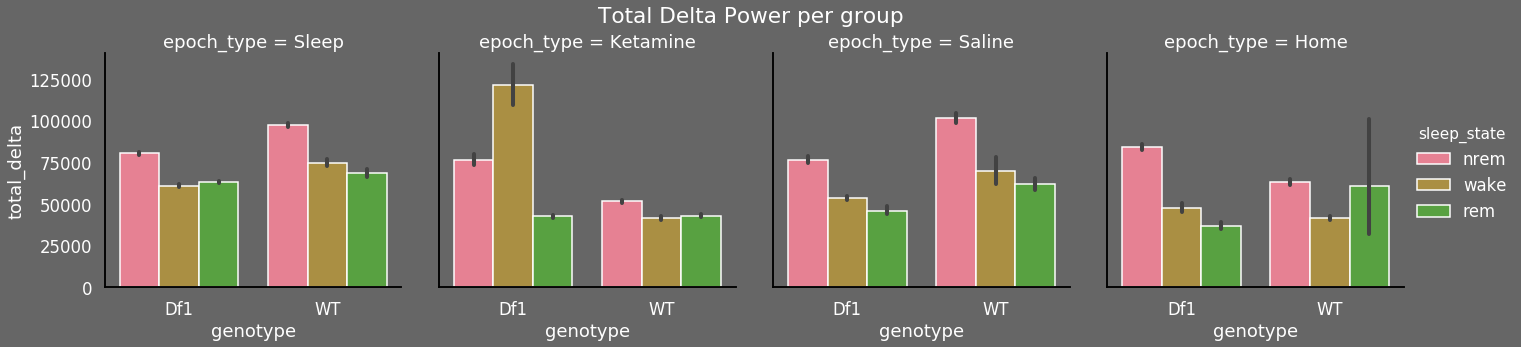

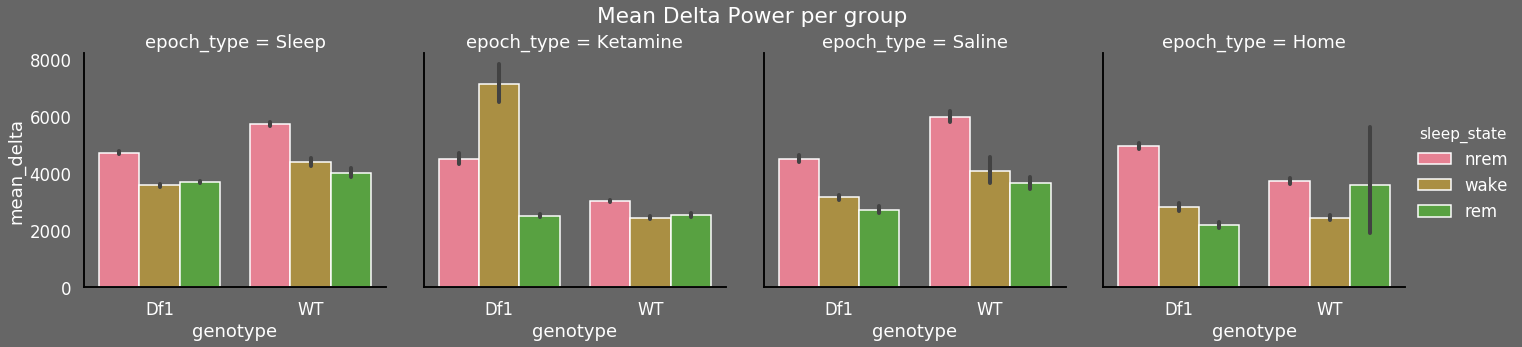

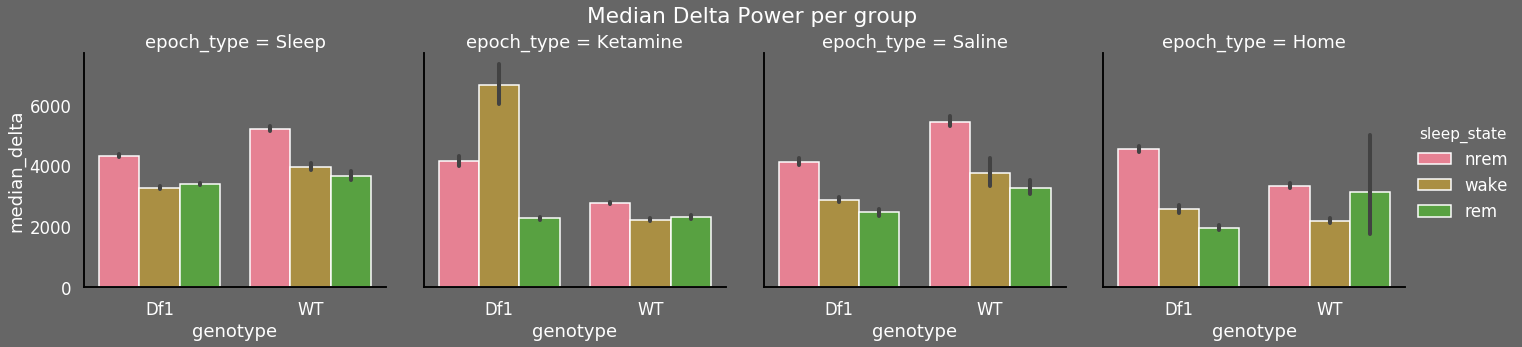

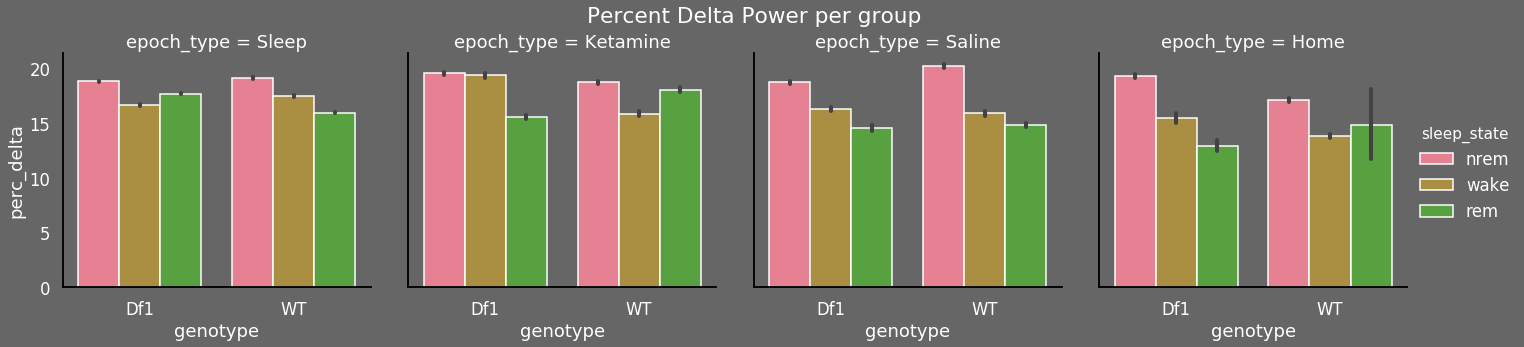

In [9]:
# Compare total and mean delta power
g = sns.catplot(x='genotype',y='total_delta',hue='sleep_state',data=df,col='epoch_type',kind='bar',palette=col_palette)
addTitle(g,'Total Delta Power per group')
g2 = sns.catplot(x='genotype',y='mean_delta',hue='sleep_state',data=df,col='epoch_type',kind='bar',palette=col_palette)
addTitle(g2,'Mean Delta Power per group')
g3 = sns.catplot(x='genotype',y='median_delta',hue='sleep_state',data=df,col='epoch_type',kind='bar',palette=col_palette)
addTitle(g3,'Median Delta Power per group')
g4 = sns.catplot(x='genotype',y='perc_delta',hue='sleep_state',data=df,col='epoch_type',kind='bar',palette=col_palette)
addTitle(g4,'Percent Delta Power per group')

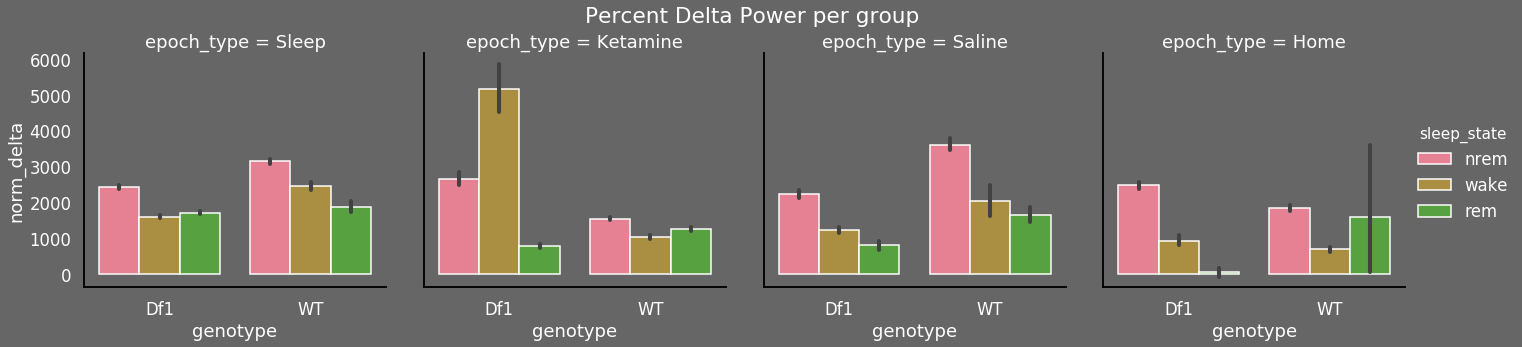

In [28]:
g3 = sns.catplot(x='genotype',y='norm_delta',hue='sleep_state',data=df,col='epoch_type',kind='bar',palette=col_palette)
addTitle(g3,'Percent Delta Power per group')

/home/roshan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


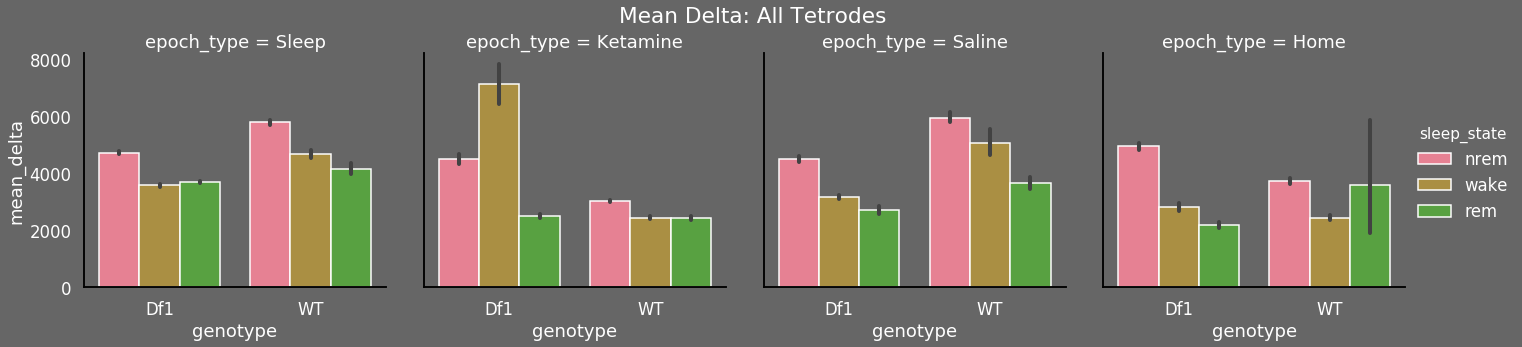

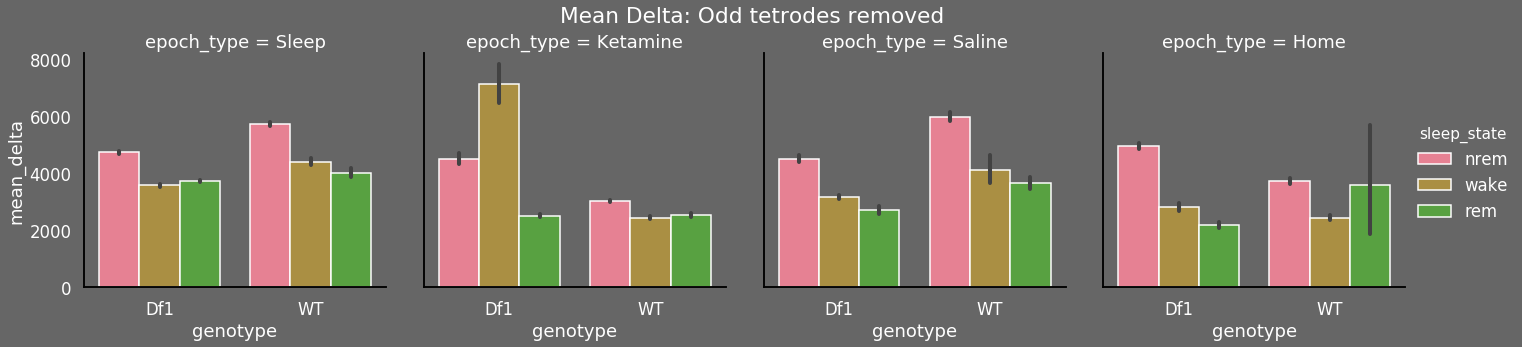

In [163]:
# To see impact of removed tetrodes
# Plot whole dataset
g = sns.catplot(x='genotype',y='mean_delta',hue='sleep_state',data=dataMat.query("not (sleep_state=='transition')"),col="epoch_type",kind='bar',palette=col_palette)
addTitle(g,'Mean Delta: All Tetrodes')
# Plot with tetrodes removed
g2 = sns.catplot(x='genotype',y='mean_delta',hue='sleep_state',data=df,col="epoch_type",kind='bar',palette=col_palette)
addTitle(g2,'Mean Delta: Odd tetrodes removed')

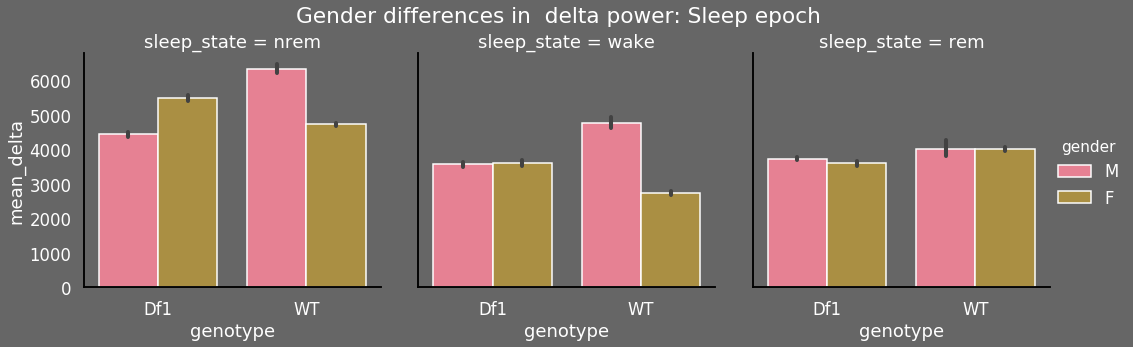

In [13]:
# Check gender differences
g = sns.catplot(x='genotype',y='mean_delta',hue='gender',data=df[df.epoch_type=='Sleep'],col="sleep_state",kind='bar',palette=col_palette)
addTitle(g,'Gender differences in  delta power: Sleep epoch')

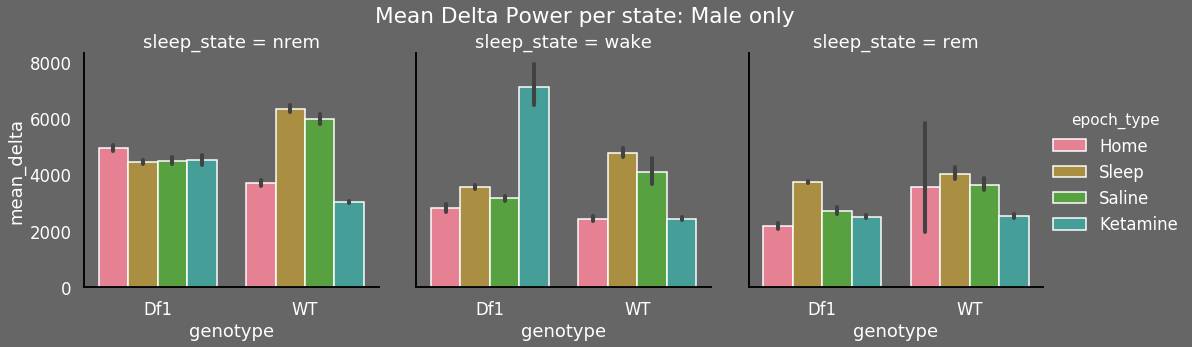

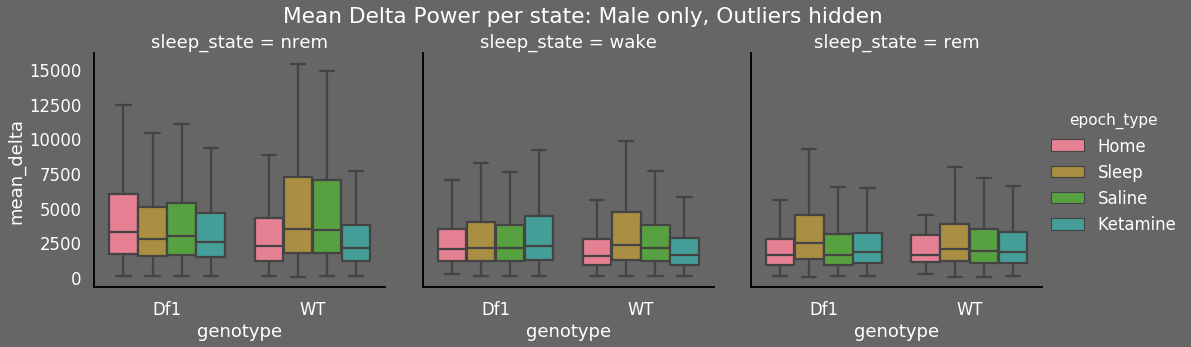

In [16]:
# Plot to see epoch differences
g = sns.catplot(x='genotype',y='mean_delta',hue='epoch_type',col='sleep_state',data=df[df.gender=='M'],hue_order=['Home','Sleep','Saline','Ketamine'],kind='bar',palette=col_palette)
addTitle(g,'Mean Delta Power per state: Male only')
g = sns.catplot(x='genotype',y='mean_delta',hue='epoch_type',col='sleep_state',data=df[df.gender=='M'],hue_order=['Home','Sleep','Saline','Ketamine'],showfliers=False,kind='box',palette=col_palette)
addTitle(g,'Mean Delta Power per state: Male only, Outliers hidden')

/home/roshan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


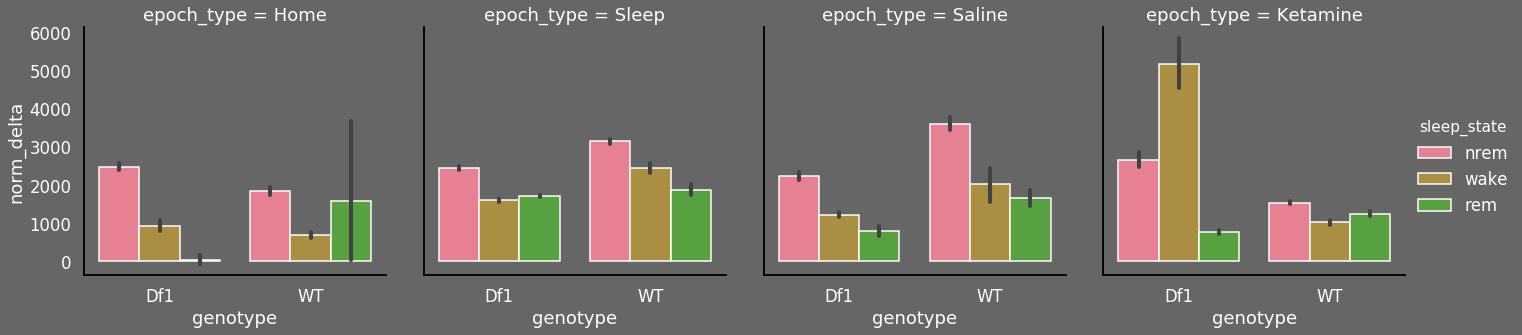

In [140]:
g2 = sns.catplot(x='genotype',y='norm_delta',hue='sleep_state',col='epoch_type',data=df,hue_order=['nrem','wake','rem'],col_order=['Home','Sleep','Saline','Ketamine'],kind='bar',palette=col_palette)

/home/roshan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


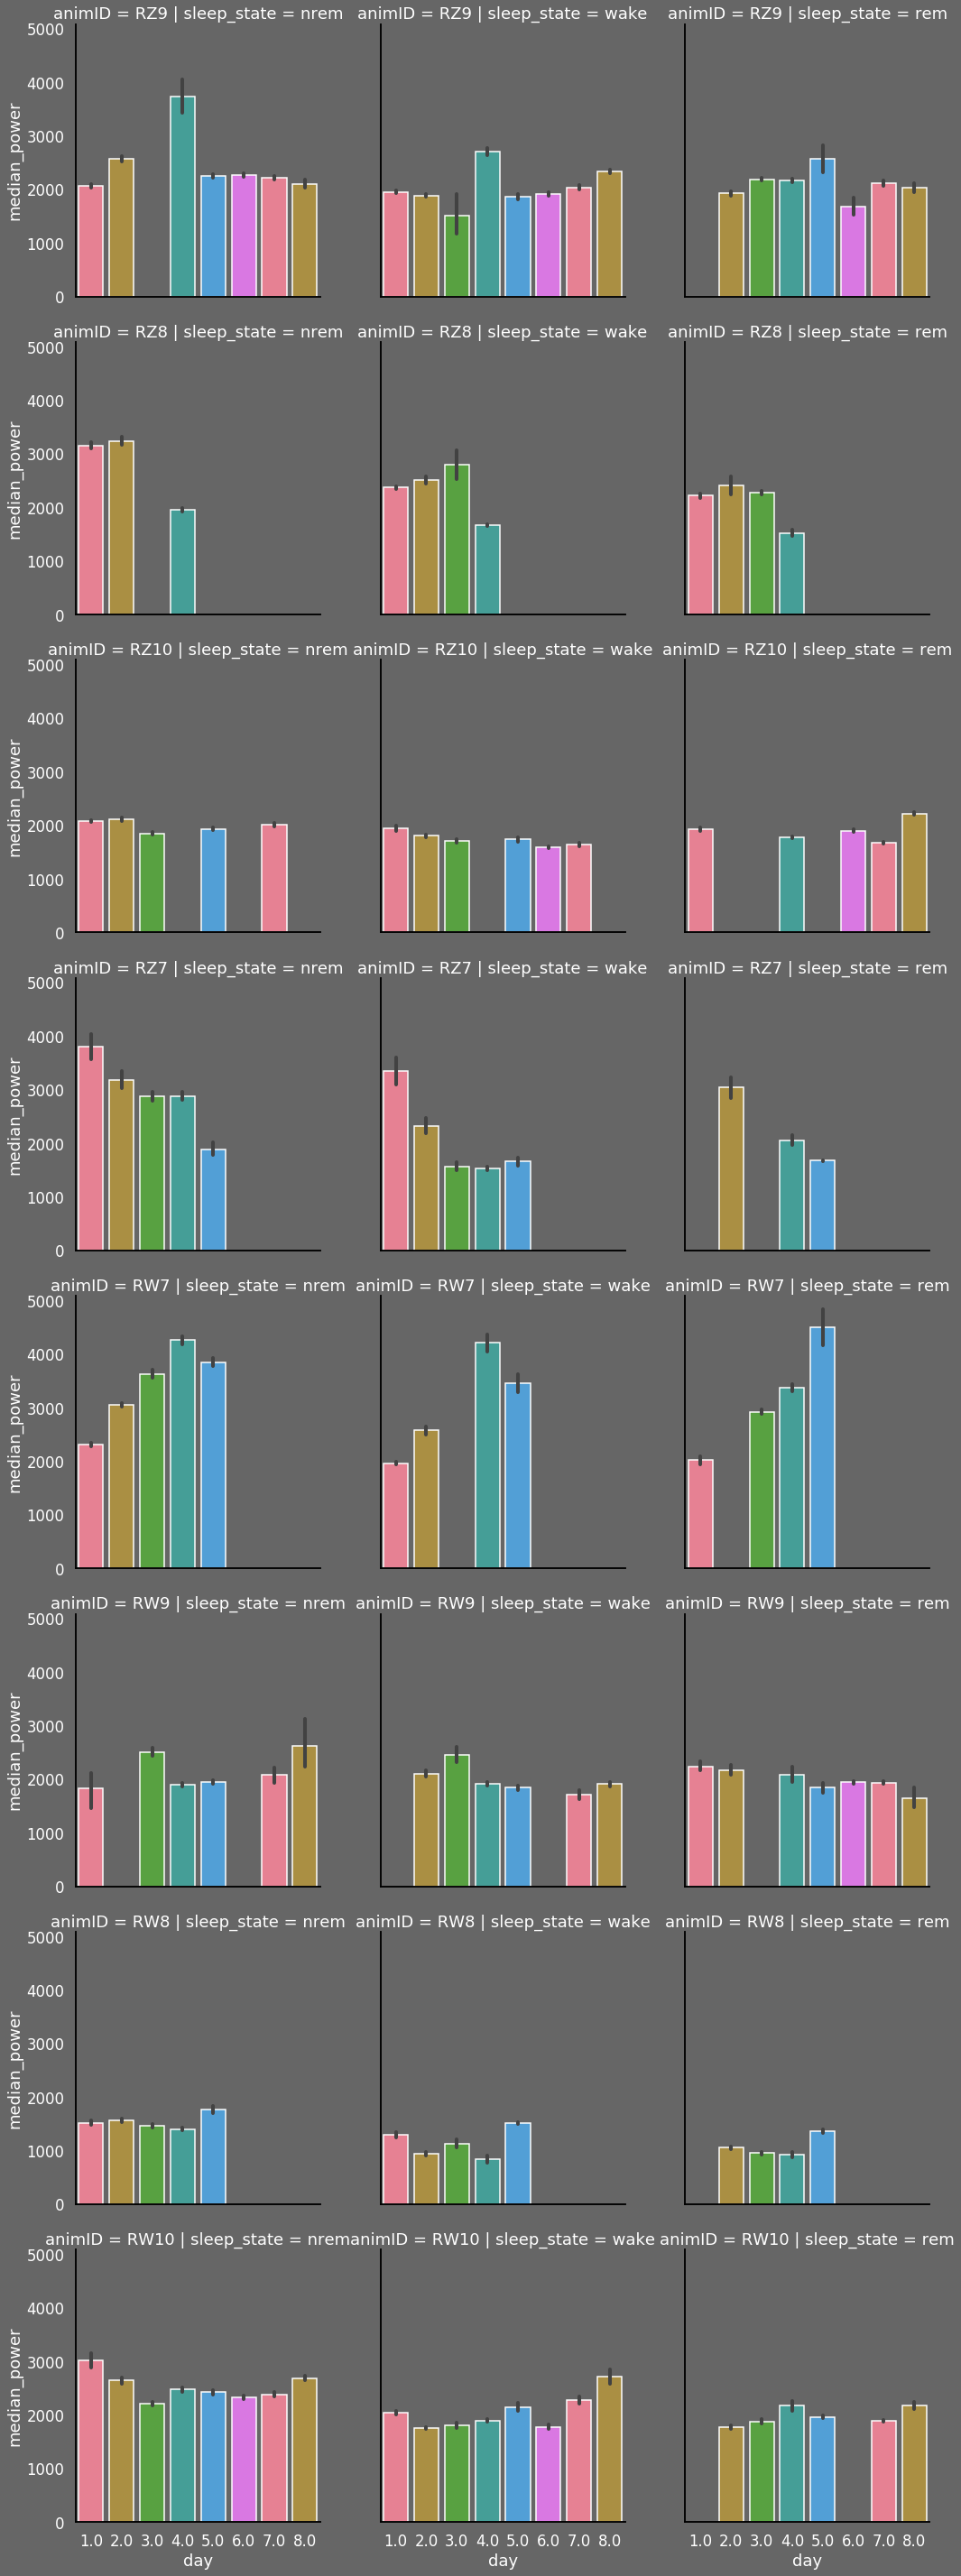

In [134]:
# Plot to see epoch differences
sns.set_context('talk')
g = sns.catplot(x='day',y='median_power',row='animID',col='sleep_state',data=df.query("epoch_type=='Sleep'"),kind='bar',palette=col_palette)

/home/roshan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


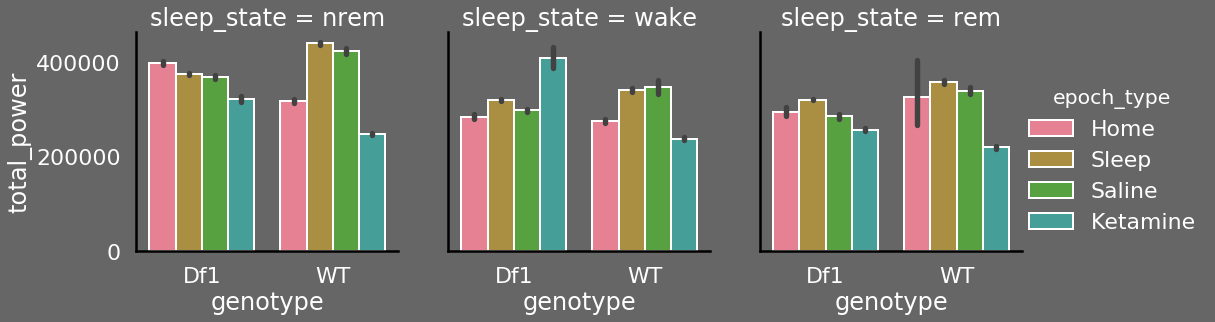

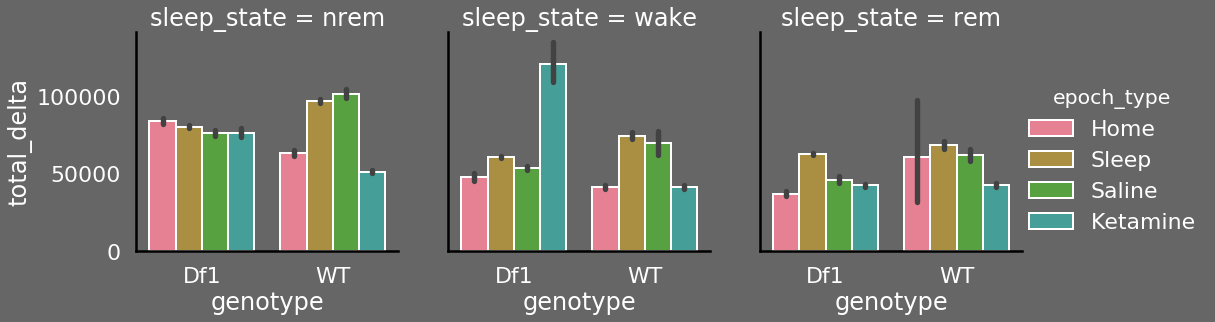

In [129]:
g = sns.catplot(x='genotype',y='total_delta',hue='epoch_type',col='sleep_state',data=df,hue_order=['Home','Sleep','Saline','Ketamine'],kind='bar',palette=col_palette)

In [98]:
mini = df.sample(frac=.05,replace=False)

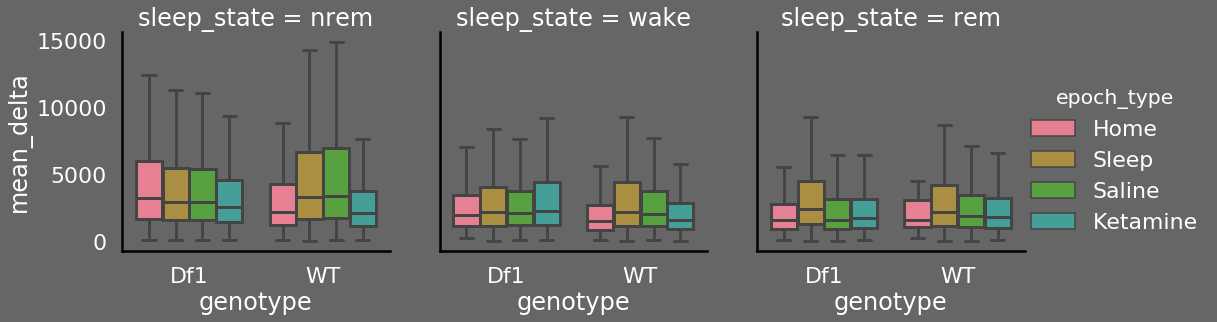

In [106]:
sns.catplot(data=df,x="genotype",kind='box',showfliers=False,hue='epoch_type',y='mean_delta',col='sleep_state',hue_order=['Home','Sleep','Saline','Ketamine'],palette=col_palette)

In [14]:
# Take log power and make violin plot
# Normalize power and make violin plot
# Bootstrap errors
# Plot home vs sleep but only on same day

/home/roshan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


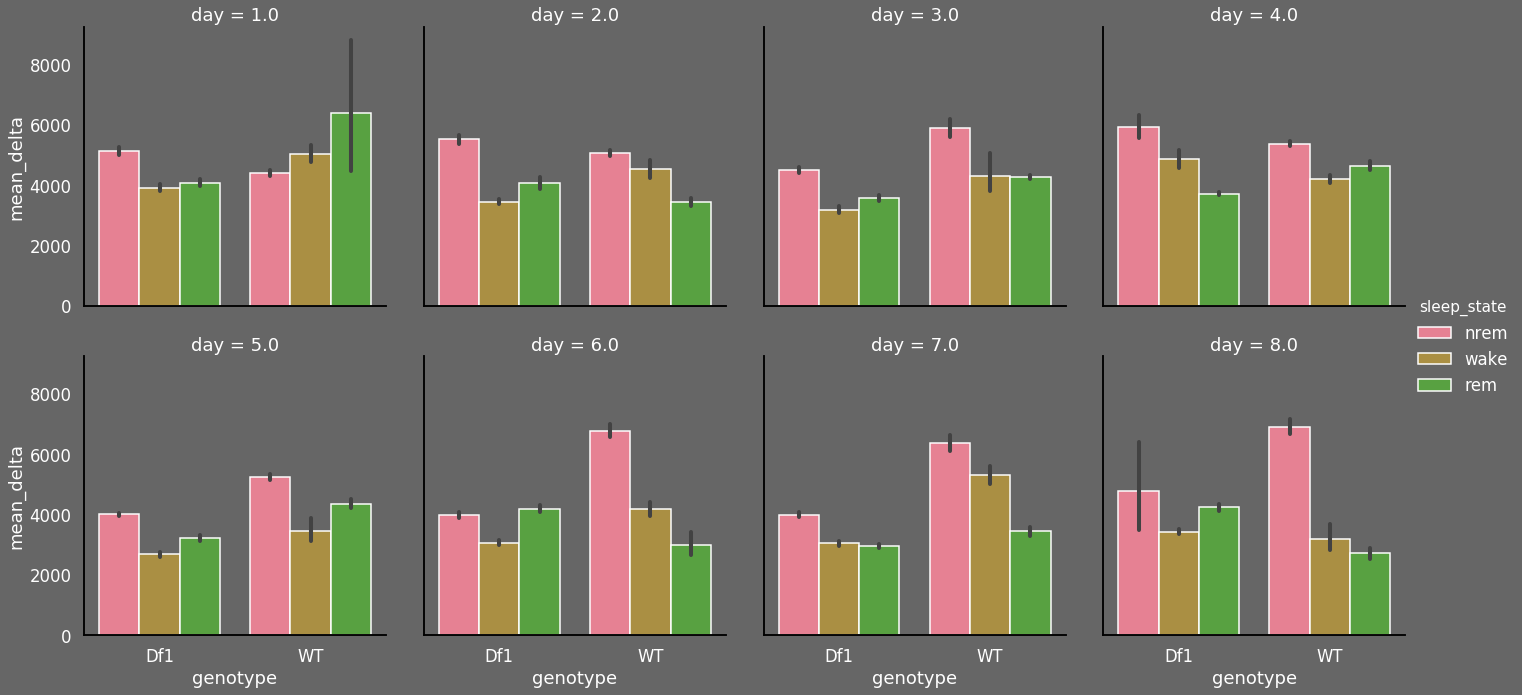

In [66]:
sns.catplot(x='genotype',y='mean_delta',hue='sleep_state',col='day',col_wrap=4,data=df.query("epoch_type=='Sleep'"),palette=col_palette,kind='bar')

/home/roshan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


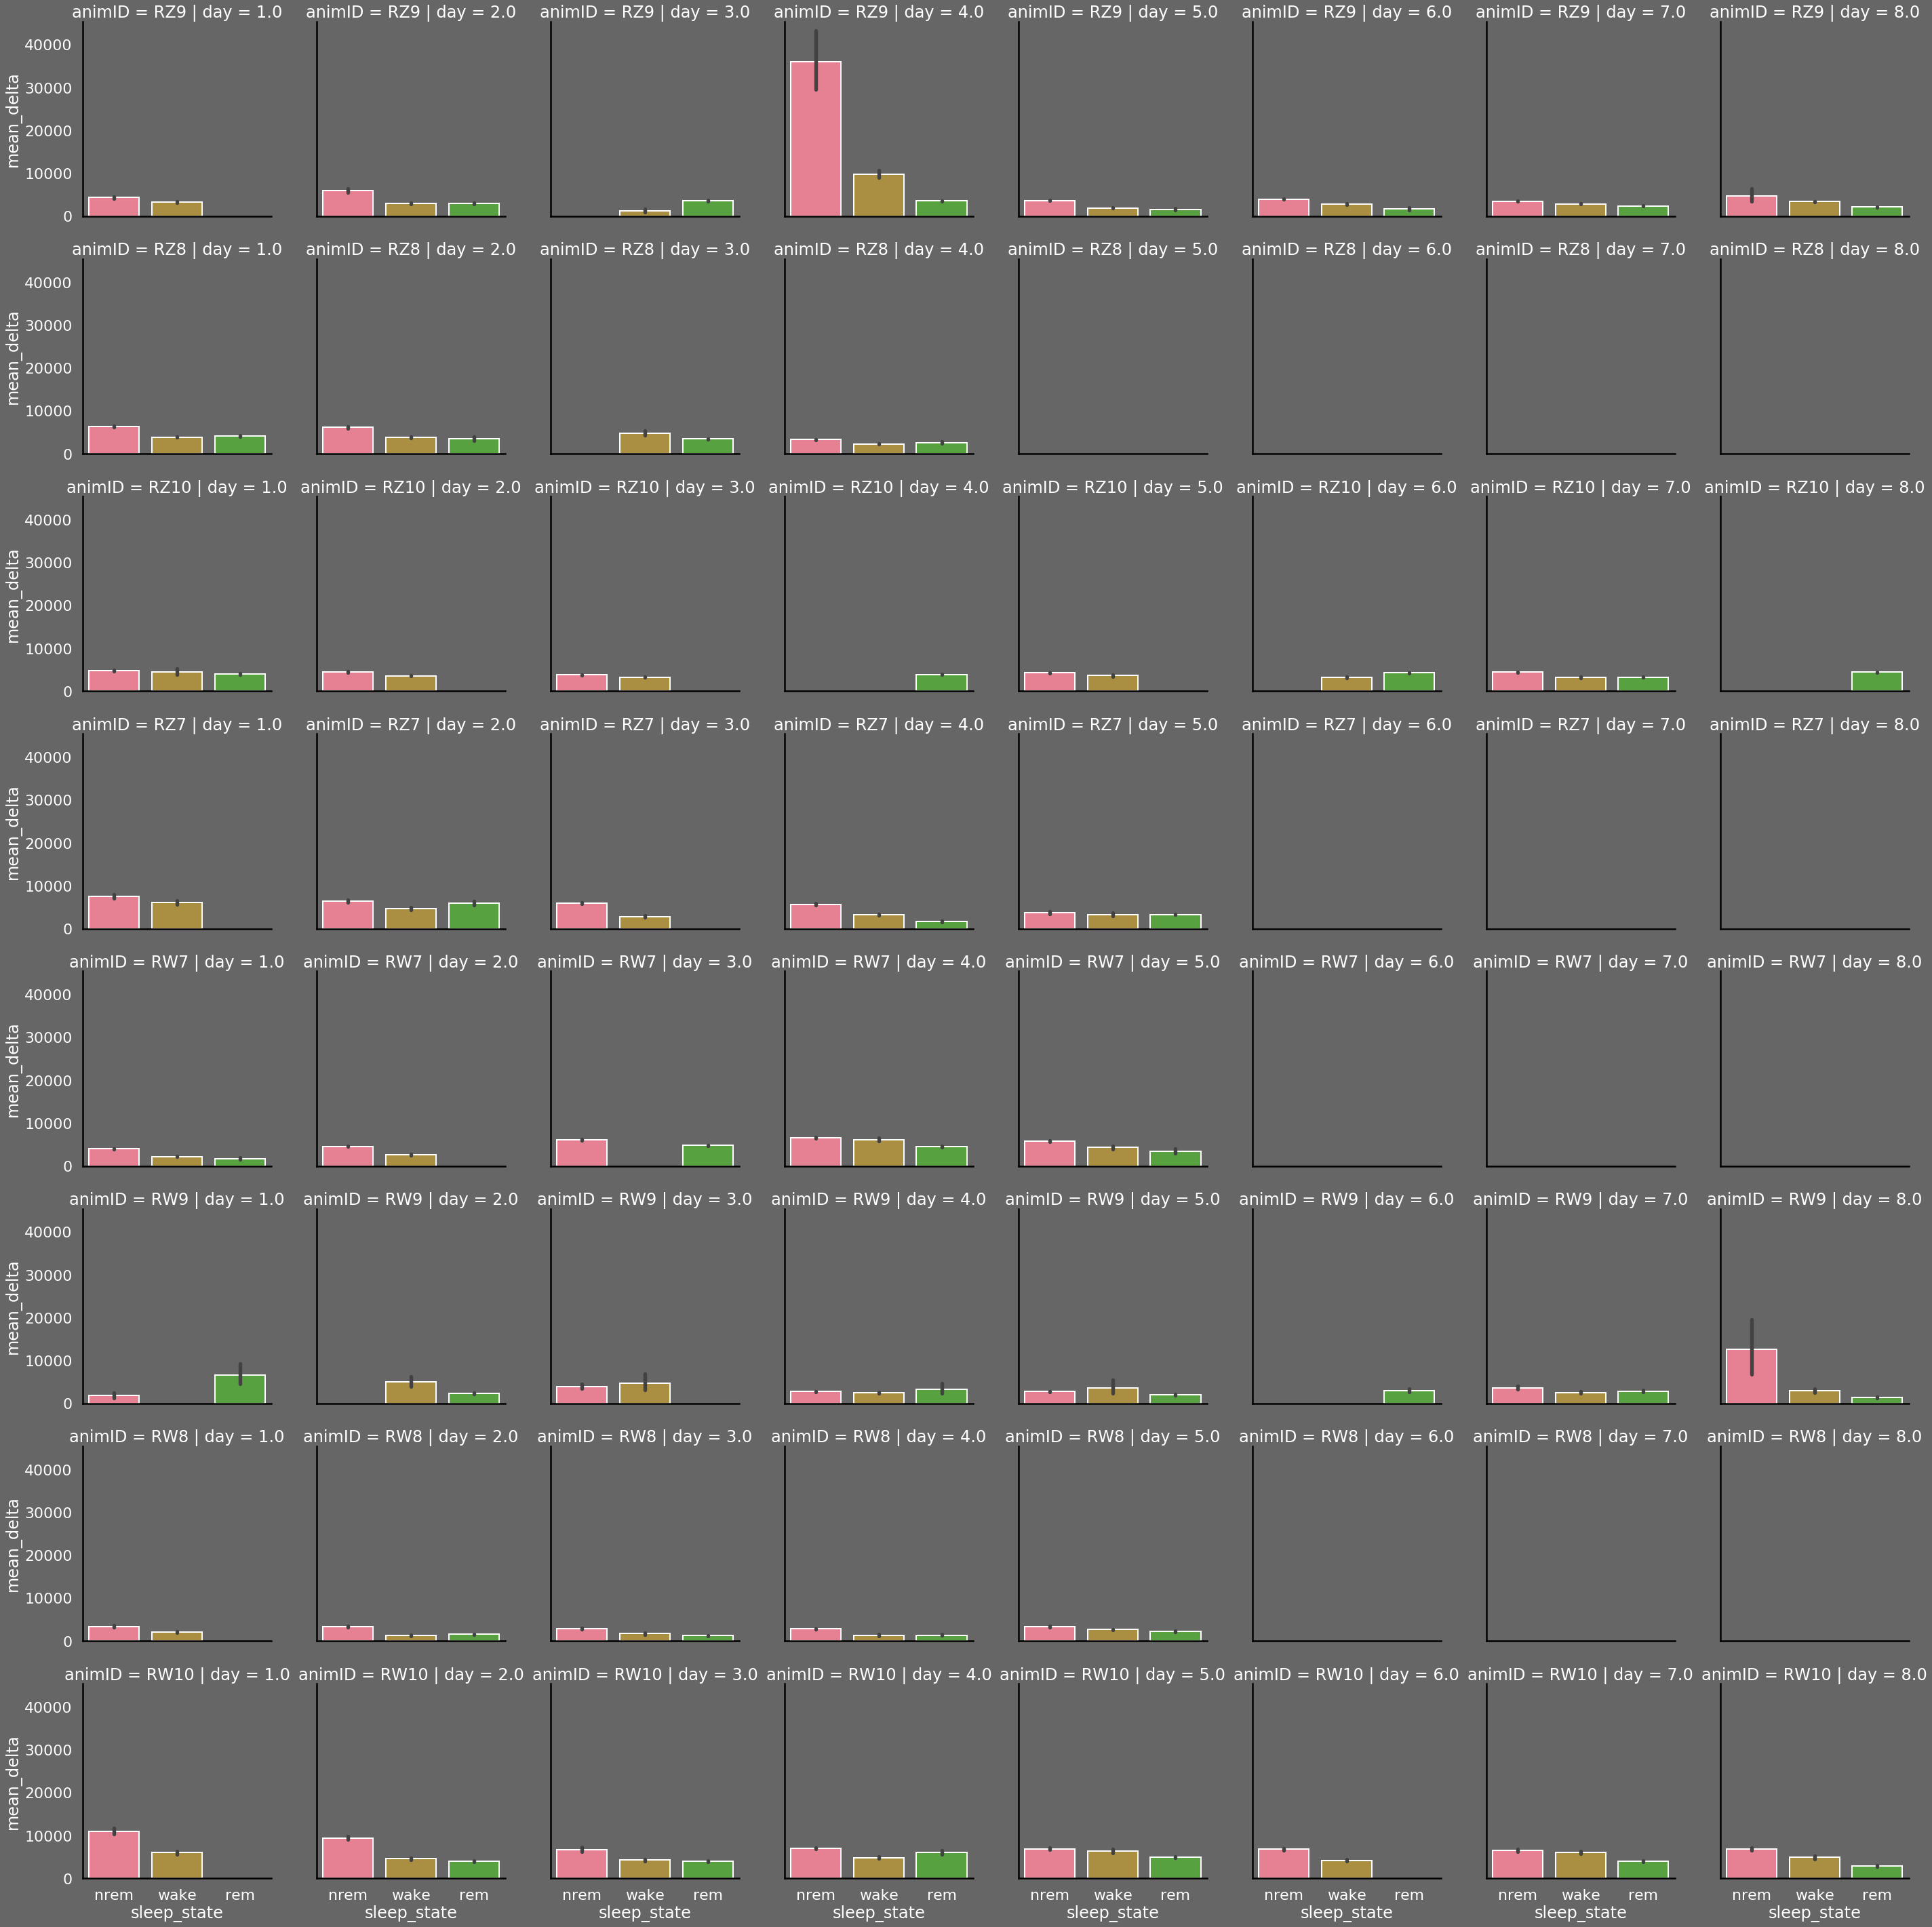

In [108]:
# Delta power per day for each animal
sns.catplot(x='sleep_state',y='mean_delta',col='day',row='animID',data=df.query("epoch_type=='Sleep'"),palette=col_palette,kind='bar')
# something weird with RZ9 day 4

In [29]:
# Time in each sleep state per day per animal 
np.max(df[['mean_delta','mean_power','norm_delta']])

mean_delta    3400651.644
mean_power     792564.837
norm_delta    3361571.879
dtype: float64

In [33]:
df[df['mean_delta']>=900000]

,animID,genotype,gender,estrus,age,weight_change,rec_time,day,epoch,tetrode,...,median_delta,std_delta,total_theta,mean_theta,median_theta,std_theta,log_mean_delta,log_total_delta,norm_delta,perc_delta
59842,RZ9,Df1,M,0.0,146.0,4.7,09:00:00,4.0,1.0,8.0,...,825429.169,430551.404,1780532.560,104737.209,110291.351,19194.685,5.954309,7.184758,887515.547,56.182452
63641,RZ9,Df1,M,0.0,146.0,4.7,09:00:00,4.0,2.0,1.0,...,1312695.055,728464.497,876451.355,51555.962,53843.721,11179.445,6.120580,7.351029,1300780.833,62.391517
65485,RZ9,Df1,M,0.0,146.0,4.7,09:00:00,4.0,2.0,2.0,...,1353995.244,784453.411,1032226.646,60719.214,64647.132,15566.623,6.136033,7.366482,1346762.702,61.578141
67329,RZ9,Df1,M,0.0,146.0,4.7,09:00:00,4.0,2.0,8.0,...,1390140.321,796436.913,785661.835,46215.402,45233.961,8846.915,6.146873,7.377322,1387692.086,62.497194
204,RW9,WT,M,0.0,143.0,3.3,16:00:00,1.0,1.0,2.0,...,976068.409,156665.306,3721692.159,218923.068,219246.646,100666.515,5.999446,7.229895,914794.503,51.604081
912,RW9,WT,M,0.0,143.0,3.3,16:00:00,1.0,1.0,2.0,...,978209.054,336598.674,4449259.721,261721.160,232720.391,198287.075,5.991613,7.222062,938825.496,51.123833
917,RW9,WT,M,0.0,143.0,3.3,16:00:00,1.0,1.0,2.0,...,3328682.461,2074410.940,2929302.637,172311.920,186354.996,44603.617,6.531562,7.762011,3361571.879,60.282450
2359,RW9,WT,M,0.0,143.0,3.3,16:00:00,1.0,1.0,2.0,...,984503.276,370101.210,4244942.081,249702.475,171173.566,211286.096,6.008341,7.238790,948750.318,49.074419
7366,RW9,WT,M,0.0,144.0,2.9,11:30:00,2.0,1.0,2.0,...,929316.666,617635.199,1431061.429,84180.084,74798.890,17653.766,5.981077,7.211525,922894.512,54.500194
9207,RW9,WT,M,0.0,144.0,2.9,11:30:00,2.0,1.0,2.0,...,928320.267,697840.649,969687.543,57040.444,28202.834,55776.553,5.991708,7.222157,966120.073,57.240036


In [56]:
grouped = dataMat.groupby(['animID','epoch_type','day','tetrode'])
a = (grouped['sleep_state'].value_counts()/60)

In [60]:
a[:50]

animID  epoch_type  day  tetrode  sleep_state
RW10    Home        8.0  2.0      nrem           29.166667
                                  wake           15.850000
                                  transition      0.016667
                         3.0      nrem           29.166667
                                  wake           15.850000
                                  transition      0.016667
                         6.0      nrem           29.166667
                                  wake           15.850000
                                  transition      0.016667
                         8.0      nrem           29.166667
                                  wake           15.850000
                                  transition      0.016667
        Ketamine    2.0  1.0      nrem           27.800000
                                  wake            2.716667
                                  transition      0.016667
                         2.0      nrem           27.800000
          